In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as datasets
% matplotlib inline

## Create toy data set

In [65]:
x_train, y_train = datasets.make_regression(n_features=1, noise=10, bias=50)

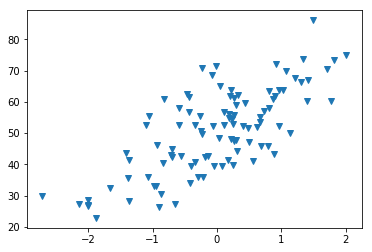

In [66]:
plt.plot(x_train, y_train, 'v')

## Train a Linear Regression model

In [85]:
model = nn.Linear(1,1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Loss is 82.3819351196289 at epoch 0


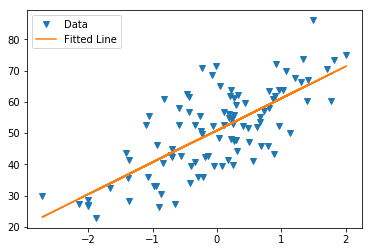

Loss is 82.38191223144531 at epoch 1000


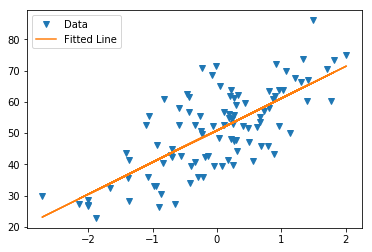

Loss is 82.38194274902344 at epoch 2000


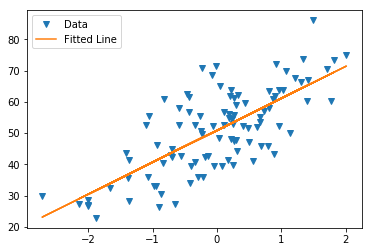

Loss is 82.3819351196289 at epoch 3000


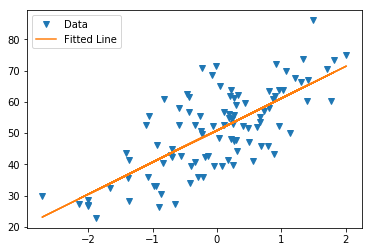

Loss is 82.3819351196289 at epoch 4000


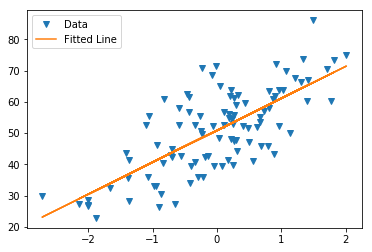

Loss is 82.3819351196289 at epoch 5000


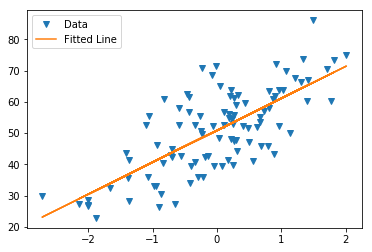

Loss is 82.38192749023438 at epoch 6000


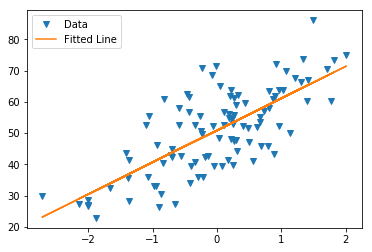

Loss is 82.38191223144531 at epoch 7000


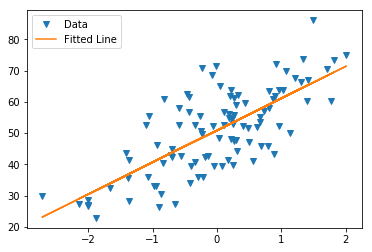

Loss is 82.38189697265625 at epoch 8000


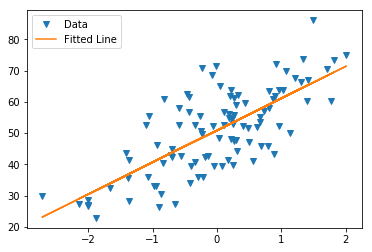

Loss is 82.38192749023438 at epoch 9000


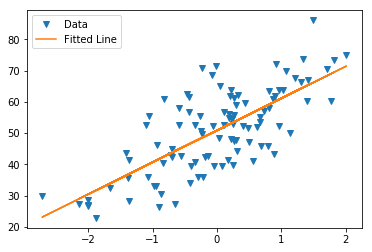

Loss is 82.3819351196289 at epoch 10000


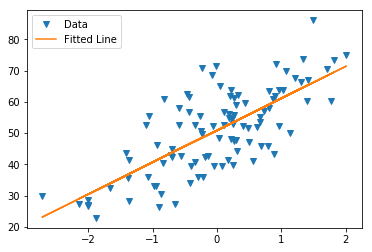

In [87]:
for epoch in range(10001):
    y_pred = model(torch.from_numpy(x_train.astype(np.float32)))
    loss = loss_fn(y_pred, torch.from_numpy(y_train.astype(np.float32).reshape(-1,1)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%1000==0:
        print(f'Loss is {loss} at epoch {epoch}')
        plot_fit(x_train, y_train, y_pred)

In [80]:
def plot_fit(x_train, y_train, y_pred):
    plt.plot(x_train, y_train, 'v', label='Data')
    plt.plot(x_train, y_pred.detach().numpy(), label='Fitted Line')
    plt.legend()
    plt.show()